In [1]:
import geopandas
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
ftype = 'place'
files = glob.glob(f'{ftype}/*.shp')
print(files)

['place/tl_2021_44_place.shp', 'place/tl_2021_55_place.shp', 'place/tl_2021_25_place.shp', 'place/tl_2021_30_place.shp', 'place/tl_2021_26_place.shp', 'place/tl_2021_17_place.shp', 'place/tl_2021_19_place.shp', 'place/tl_2021_53_place.shp', 'place/tl_2021_06_place.shp', 'place/tl_2021_34_place.shp', 'place/tl_2021_46_place.shp', 'place/tl_2021_56_place.shp', 'place/tl_2021_02_place.shp', 'place/tl_2021_21_place.shp', 'place/tl_2021_27_place.shp', 'place/tl_2021_18_place.shp', 'place/tl_2021_40_place.shp', 'place/tl_2021_36_place.shp', 'place/tl_2021_38_place.shp', 'place/tl_2021_31_place.shp', 'place/tl_2021_22_place.shp', 'place/tl_2021_42_place.shp', 'place/tl_2021_39_place.shp', 'place/tl_2021_37_place.shp', 'place/tl_2021_23_place.shp', 'place/tl_2021_60_place.shp', 'place/tl_2021_45_place.shp', 'place/tl_2021_04_place.shp', 'place/tl_2021_24_place.shp', 'place/tl_2021_49_place.shp', 'place/tl_2021_48_place.shp', 'place/tl_2021_41_place.shp', 'place/tl_2021_12_place.shp', 'place/tl

In [17]:


# files = ['/home/shumway743/cis5500_group/geo/state/tl_2021_us_state.shp']
dfs = []
for file in files:
    shp_file = geopandas.read_file(file)
    shp_file1 = shp_file.simplify(tolerance=.01)
    shp_file['simple'] = shp_file1
    shp_file['geojson'] = shp_file.simple.apply(lambda x: geopandas.GeoSeries([x]).to_json())
    # shp_file = shp_file.drop(['geometry','simple'],axis=1)
    dfs.append(shp_file)
    # shp_file1.to_file(file + '_simple.geojson', driver='GeoJSON')

df = pd.concat(dfs)

In [13]:
df.count()

STATEFP     32188
PLACEFP     32188
PLACENS     32188
GEOID       32188
NAME        32188
NAMELSAD    32188
LSAD        32188
CLASSFP     32188
PCICBSA     32188
PCINECTA    32188
MTFCC       32188
FUNCSTAT    32188
ALAND       32188
AWATER      32188
INTPTLAT    32188
INTPTLON    32188
geojson     32188
dtype: int64

In [14]:
data = pd.read_csv(f'/home/shumway743/cis5500_group/census/data/backup/{ftype}_2021_census_api_p.csv')
data['GEOID'] = data.GEO_ID.apply(lambda x: x.split('US')[-1])
# df.STATEFP = df.STATEFP.astype(int)
merged = df.merge(data[['GEO_ID','GEOID']],on='GEOID')

print(len(merged.index))
merged.head()

31908


,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geojson,GEO_ID
0,44,22960,01220071,4422960,East Providence,East Providence city,25,C5,N,N,G4110,A,34406028,8602870,+41.8004329,-071.3592577,"{""type"": ""FeatureCollection"", ""features"": [{""i...",1600000US4422960
1,44,59000,01220076,4459000,Providence,Providence city,25,C5,Y,Y,G4110,A,47670949,5643960,+41.8230558,-071.4187841,"{""type"": ""FeatureCollection"", ""features"": [{""i...",1600000US4459000
2,44,80780,01220079,4480780,Woonsocket,Woonsocket city,25,C5,N,N,G4110,A,20062373,502381,+42.0017078,-071.4999468,"{""type"": ""FeatureCollection"", ""features"": [{""i...",1600000US4480780
3,44,19180,01220069,4419180,Cranston,Cranston city,25,C5,N,N,G4110,A,73413573,4331474,+41.7697341,-071.4850489,"{""type"": ""FeatureCollection"", ""features"": [{""i...",1600000US4419180
4,44,14140,01220067,4414140,Central Falls,Central Falls city,25,C5,N,N,G4110,A,3092443,208466,+41.8900642,-071.3934808,"{""type"": ""FeatureCollection"", ""features"": [{""i...",1600000US4414140


In [15]:
tmp = df.merge(data[['GEO_ID','GEOID']],on='GEOID',how='left')
tmp[tmp.GEO_ID.isnull()]

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geojson,GEO_ID
9038,21,48000,02404963,2148000,Louisville,Louisville city,25,C9,N,N,G4110,N,159239204,12488303,+38.2247283,-085.7406138,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
18691,60,71300,02414251,6071300,Si'ufaga,Si'ufaga village,47,C1,N,N,G4110,A,14932463,56423053,-14.2487771,-169.4941563,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
18692,60,66500,02414248,6066500,Sa'ilele,Sa'ilele village,47,C1,N,N,G4110,A,1371428,9621057,-14.2559549,-170.6031160,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
18693,60,82500,02414256,6082500,Utulei,Utulei village,47,C1,N,N,G4110,A,861788,511817,-14.2835047,-170.6799569,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
18694,60,89700,02414261,6089700,Vatia,Vatia village,47,C1,N,N,G4110,A,6464464,62541435,-14.2348405,-170.6709625,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30439,78,27000,02651573,7827000,Coral Bay,Coral Bay CDP,57,U1,N,N,G4210,S,4742478,975010,+18.3451896,-064.7172899,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
30440,78,28000,02414009,7828000,Cruz Bay,Cruz Bay CDP,57,U1,N,N,G4210,S,7828060,2463942,+18.3237480,-064.7797895,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
30441,78,39700,02414020,7839700,Frederiksted Southeast,Frederiksted Southeast CDP,57,U2,N,N,G4210,S,2617382,0,+17.7030250,-064.8763337,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN
30442,78,65530,02651575,7865530,Red Hook,Red Hook CDP,57,U2,N,N,G4210,S,733480,716140,+18.3246120,-064.8412258,"{""type"": ""FeatureCollection"", ""features"": [{""i...",NaN


In [16]:

merged['type']=ftype
out = merged[['GEO_ID','type','geojson']].rename({'GEO_ID':'geo_id'},axis=1).set_index('geo_id')
out.to_csv(f'geo_out_{ftype}.csv')

<Axes: >

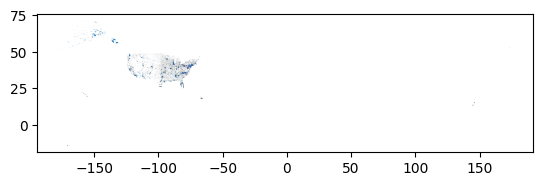

In [18]:
df.simple.plot()

In [21]:
files = [
    'geo_out_county.csv',
    'geo_out_metro.csv',
    'geo_out_state.csv',
    'geo_out_place.csv'
]

dfs = []

for file in files:
    dfs.append(pd.read_csv(file))

df = pd.concat(dfs)
df.head()

,geo_id,type,geojson
0,0500000US31039,county,"{""type"": ""FeatureCollection"", ""features"": [{""i..."
1,0500000US53069,county,"{""type"": ""FeatureCollection"", ""features"": [{""i..."
2,0500000US35011,county,"{""type"": ""FeatureCollection"", ""features"": [{""i..."
3,0500000US31109,county,"{""type"": ""FeatureCollection"", ""features"": [{""i..."
4,0500000US31129,county,"{""type"": ""FeatureCollection"", ""features"": [{""i..."


In [22]:
df.to_csv('geo_combined.csv',index=False)